In [1]:
from ImageAlgoKD import *

## 1. Generate Toy Data Points

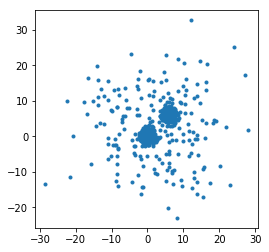

In [22]:
kPoints = 2
# make 1000 toy points
p1 = np.random.normal(array([0,0]),np.array([1,1]),size=(500,kPoints))
p2 = np.random.normal(array([6,6]),np.array([1,1]),size=(300,kPoints))
p3 = np.random.normal(array([2.5,2.5]),np.array([10,10]),size=(200,kPoints))
points = Points(np.r_[p1,p2,p3])
# plot toy points
plt.figure(figsize=(4,4),facecolor="w")
plt.plot( points.cords[:,0],points.cords[:,1], "." )

## 2. Define Clustering Parameters

In [3]:
# define clustering parameters
ia = ImageAlgoKD(MAXDISTANCE        = 50,
                 KERNEL_R           = 1.0,
                 KERNEL_R_NORM      = 1.0,
                 KERNEL_R_POWER     = 0.0,
                 DECISION_RHO_KAPPA = 5.0,
                 DECISION_NHD       = 2.0,
                 CONTINUITY_NHD     = 1.0)
ia.setInputsPoints(points)

## 3. Run and Plot Result

clustering finished!
Total time with opencl is 69.2580 ms


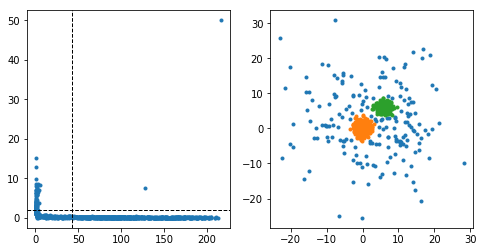

In [21]:
# run
ia.run("opencl",1,48)

# plot result
plt.figure(figsize=(8,4),facecolor="w")

plt.subplot(1,2,1)
plt.plot(ia.points.rho,ia.points.nhd, ".")
plt.axvline(ia.DECISION_RHO,color='k',linestyle="--",linewidth=1)
plt.axhline(ia.DECISION_NHD,color='k',linestyle="--",linewidth=1)

plt.subplot(1,2,2)
for icluster in np.unique(ia.points.clusterID):
    sl = ia.points.clusterID==icluster
    x,y = ia.points.cords[sl,0],ia.points.cords[sl,1]
    plt.plot( x, y, ".")